<a href="https://colab.research.google.com/github/kumareshvj/Machine-learing---Regression/blob/main/Yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [229]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
from matplotlib import rc
from pylab import rcParams

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

### Dataset Loading

In [230]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/AlmaBetter/capstone project/Machine_learning_regression/data_YesBank_StockPrices.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [231]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [232]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [233]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [234]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [235]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

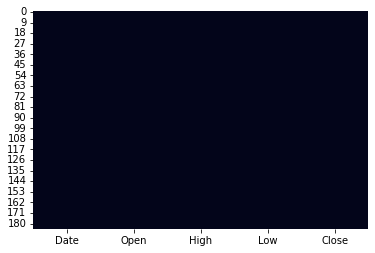

In [236]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar = False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [237]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [238]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [239]:
# Check Unique Values for each variable.
for i in df.columns.to_list():
  print('''No of unique variable in''' ,i.lower() ,'''is''' ,df[i].nunique())



No of unique variable in date is 185
No of unique variable in open is 183
No of unique variable in high is 184
No of unique variable in low is 183
No of unique variable in close is 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [240]:
# Write your code to make your dataset analysis ready.

In [241]:
df['Date'].unique()

array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
       'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
       'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
       'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
       'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
       'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
       'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
       'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
       'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
       'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
       'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
       'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
       'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
       'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
       'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-

In [242]:
# Getting highest and lowest traded price of the stock
Highest_stock_Price = df['Close'].max()
print(f'Highest price of the stock is {Highest_stock_Price}')

Lowest_stock_price = df['Close'].min()
print(f'Lowest price of the stock is {Lowest_stock_price}')

Highest price of the stock is 367.9
Lowest price of the stock is 9.98


In [243]:
df['year'] = df['Date'].apply(lambda x:x[-2:])
df.head()
df_avg_price_year = df.groupby('year')['Close'].median().reset_index()
df_avg_price_year.head()

,year,Close
0,05,13.355
1,06,18.245
2,07,36.485
3,08,26.140
4,09,30.805


In [244]:
divide = [12.46]
percentage = []
for i in df_avg_price_year['Close'].to_list():
  divide.append(i)
  value = (divide.index(i))-1
 
  x = round(((i/divide[value])*100)-100,2)
  percentage.append(x)

print(percentage)
 
    



[7.18, 36.62, 99.97, -28.35, 17.85, 89.19, -0.75, 23.55, 11.76, 37.78, 49.51, 37.54, 37.92, 6.04, -69.78, -77.55]


In [245]:
df['Onedaychange'] = ((df['Close']/df['Open'])*100)-100
df['Onedaychange'].head()

0   -4.153846
1    6.677266
2   -1.335312
3   -1.590909
4    0.449438
Name: Onedaychange, dtype: float64

In [246]:
df['singledaychange_low_high'] = ((df['Low']/df['High'])*100)-100
df['singledaychange_low_high'].min()
df['singledaychange_low_high'].max()

-5.752351097178689

In [247]:
def parse_string_to_date(datestring):

  return convert_to_year(datestring)

In [248]:
df['Date'].dtype

dtype('O')

In [249]:
df.head()

,Date,Open,High,Low,Close,year,Onedaychange,singledaychange_low_high
0,Jul-05,13.00,14.00,11.25,12.46,05,-4.153846,-19.642857
1,Aug-05,12.58,14.88,12.55,13.42,05,6.677266,-15.658602
2,Sep-05,13.48,14.87,12.27,13.30,05,-1.335312,-17.484869
3,Oct-05,13.20,14.47,12.40,12.99,05,-1.590909,-14.305460
4,Nov-05,13.35,13.88,12.88,13.41,05,0.449438,-7.204611


In [250]:
df['Formatted_date']=df.apply(lambda x : datetime.strptime(x['Date'],'%b-%y'),axis=1)
df.head()

,Date,Open,High,Low,Close,year,Onedaychange,singledaychange_low_high,Formatted_date
0,Jul-05,13.00,14.00,11.25,12.46,05,-4.153846,-19.642857,2005-07-01
1,Aug-05,12.58,14.88,12.55,13.42,05,6.677266,-15.658602,2005-08-01
2,Sep-05,13.48,14.87,12.27,13.30,05,-1.335312,-17.484869,2005-09-01
3,Oct-05,13.20,14.47,12.40,12.99,05,-1.590909,-14.305460,2005-10-01
4,Nov-05,13.35,13.88,12.88,13.41,05,0.449438,-7.204611,2005-11-01


In [251]:
df['month'] = df['Date'].apply(lambda x:x[:3])
df.head()

,Date,Open,High,Low,Close,year,Onedaychange,singledaychange_low_high,Formatted_date,month
0,Jul-05,13.00,14.00,11.25,12.46,05,-4.153846,-19.642857,2005-07-01,Jul
1,Aug-05,12.58,14.88,12.55,13.42,05,6.677266,-15.658602,2005-08-01,Aug
2,Sep-05,13.48,14.87,12.27,13.30,05,-1.335312,-17.484869,2005-09-01,Sep
3,Oct-05,13.20,14.47,12.40,12.99,05,-1.590909,-14.305460,2005-10-01,Oct
4,Nov-05,13.35,13.88,12.88,13.41,05,0.449438,-7.204611,2005-11-01,Nov


In [252]:
df['Result'] = np.where(df.Onedaychange > 0,'positive',(np.where(df.Onedaychange < 0,'negative','unchanged')))

In [253]:
df.head()

,Date,Open,High,Low,Close,year,Onedaychange,singledaychange_low_high,Formatted_date,month,Result
0,Jul-05,13.00,14.00,11.25,12.46,05,-4.153846,-19.642857,2005-07-01,Jul,negative
1,Aug-05,12.58,14.88,12.55,13.42,05,6.677266,-15.658602,2005-08-01,Aug,positive
2,Sep-05,13.48,14.87,12.27,13.30,05,-1.335312,-17.484869,2005-09-01,Sep,negative
3,Oct-05,13.20,14.47,12.40,12.99,05,-1.590909,-14.305460,2005-10-01,Oct,negative
4,Nov-05,13.35,13.88,12.88,13.41,05,0.449438,-7.204611,2005-11-01,Nov,positive


In [254]:
df.shape

(185, 11)

In [255]:
shifted = False
df1 = df[['Close']].copy()

In [256]:
df1.head()
df1.shape

(185, 1)

In [257]:

if not shifted:
  df1[0:] = df1[0:].shift(1)
  df1.loc[0] = [13]
  shifted = True

df1.head()

,Close
0,13.00
1,12.46
2,13.42
3,13.30
4,12.99


In [258]:
df1.shape

(185, 1)

In [259]:
df['new'] = (df['Close'] - df1['Close'])

In [260]:
df.head()

,Date,Open,High,Low,Close,year,Onedaychange,singledaychange_low_high,Formatted_date,month,Result,new
0,Jul-05,13.00,14.00,11.25,12.46,05,-4.153846,-19.642857,2005-07-01,Jul,negative,-0.54
1,Aug-05,12.58,14.88,12.55,13.42,05,6.677266,-15.658602,2005-08-01,Aug,positive,0.96
2,Sep-05,13.48,14.87,12.27,13.30,05,-1.335312,-17.484869,2005-09-01,Sep,negative,-0.12
3,Oct-05,13.20,14.47,12.40,12.99,05,-1.590909,-14.305460,2005-10-01,Oct,negative,-0.31
4,Nov-05,13.35,13.88,12.88,13.41,05,0.449438,-7.204611,2005-11-01,Nov,positive,0.42


In [261]:
df['daily'] = np.where(df.new > 0,'Gap_up',(np.where(df.new < 0,'Gap_Down','unchanged')))
df.head()

,Date,Open,High,Low,Close,year,Onedaychange,singledaychange_low_high,Formatted_date,month,Result,new,daily
0,Jul-05,13.00,14.00,11.25,12.46,05,-4.153846,-19.642857,2005-07-01,Jul,negative,-0.54,Gap_Down
1,Aug-05,12.58,14.88,12.55,13.42,05,6.677266,-15.658602,2005-08-01,Aug,positive,0.96,Gap_up
2,Sep-05,13.48,14.87,12.27,13.30,05,-1.335312,-17.484869,2005-09-01,Sep,negative,-0.12,Gap_Down
3,Oct-05,13.20,14.47,12.40,12.99,05,-1.590909,-14.305460,2005-10-01,Oct,negative,-0.31,Gap_Down
4,Nov-05,13.35,13.88,12.88,13.41,05,0.449438,-7.204611,2005-11-01,Nov,positive,0.42,Gap_up


In [262]:
df['Open'].dtype

dtype('float64')

In [263]:
df.head()

,Date,Open,High,Low,Close,year,Onedaychange,singledaychange_low_high,Formatted_date,month,Result,new,daily
0,Jul-05,13.00,14.00,11.25,12.46,05,-4.153846,-19.642857,2005-07-01,Jul,negative,-0.54,Gap_Down
1,Aug-05,12.58,14.88,12.55,13.42,05,6.677266,-15.658602,2005-08-01,Aug,positive,0.96,Gap_up
2,Sep-05,13.48,14.87,12.27,13.30,05,-1.335312,-17.484869,2005-09-01,Sep,negative,-0.12,Gap_Down
3,Oct-05,13.20,14.47,12.40,12.99,05,-1.590909,-14.305460,2005-10-01,Oct,negative,-0.31,Gap_Down
4,Nov-05,13.35,13.88,12.88,13.41,05,0.449438,-7.204611,2005-11-01,Nov,positive,0.42,Gap_up


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

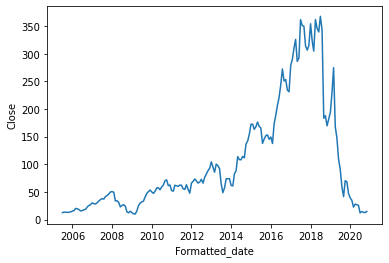

In [264]:
# Chart - 1 visualization code
sns.lineplot(data=df,x='Formatted_date',y='Close')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

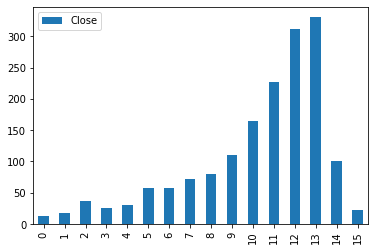

In [265]:
# Chart - 2 visualization code
df_avg_price_year.plot(kind='bar',label = 'year')
# sns.barplot(data = df_avg_price_year,x = '')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

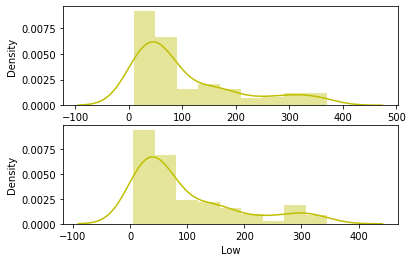

In [266]:
# Chart - 3 visualization code
plt.subplot(2,1,1)
sns.distplot(df['Open'],color ='y')
plt.subplot(2,1,2)
sns.distplot(df['Low'],color = 'y')
plt.show()

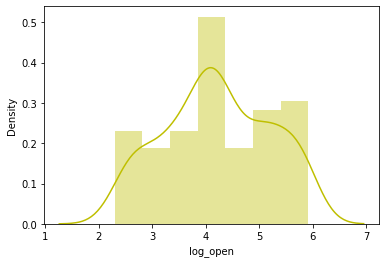

In [267]:
df['log_open'] = np.log(df['Open'])
sns.distplot(df['log_open'],color = 'y')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

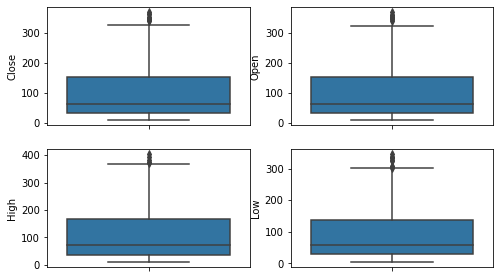

In [268]:
# Chart - 4 visualization code
plt.figure(figsize=(8, 10))
plt.subplot(4,2,1)
sns.boxplot(y=df['Close'])
plt.subplot(4,2,2)
sns.boxplot(y=df['Open'])
plt.subplot(4,2,3)
sns.boxplot(y=df['High'])
plt.subplot(4,2,4)
sns.boxplot(y=df['Low'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

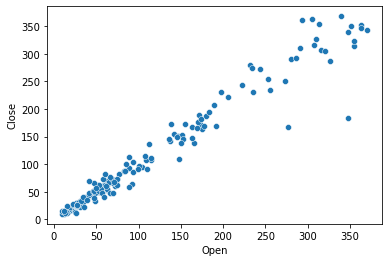

In [269]:
# Chart - 5 visualization code
sns.scatterplot(data=df,x='Open',y='Close')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [270]:
# Chart - 6 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [271]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [272]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [273]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [274]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [275]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [276]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [277]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

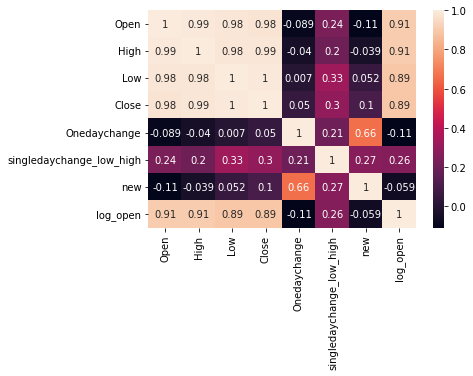

In [278]:
# Correlation Heatmap visualization code
sns.heatmap(df.corr(),annot = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

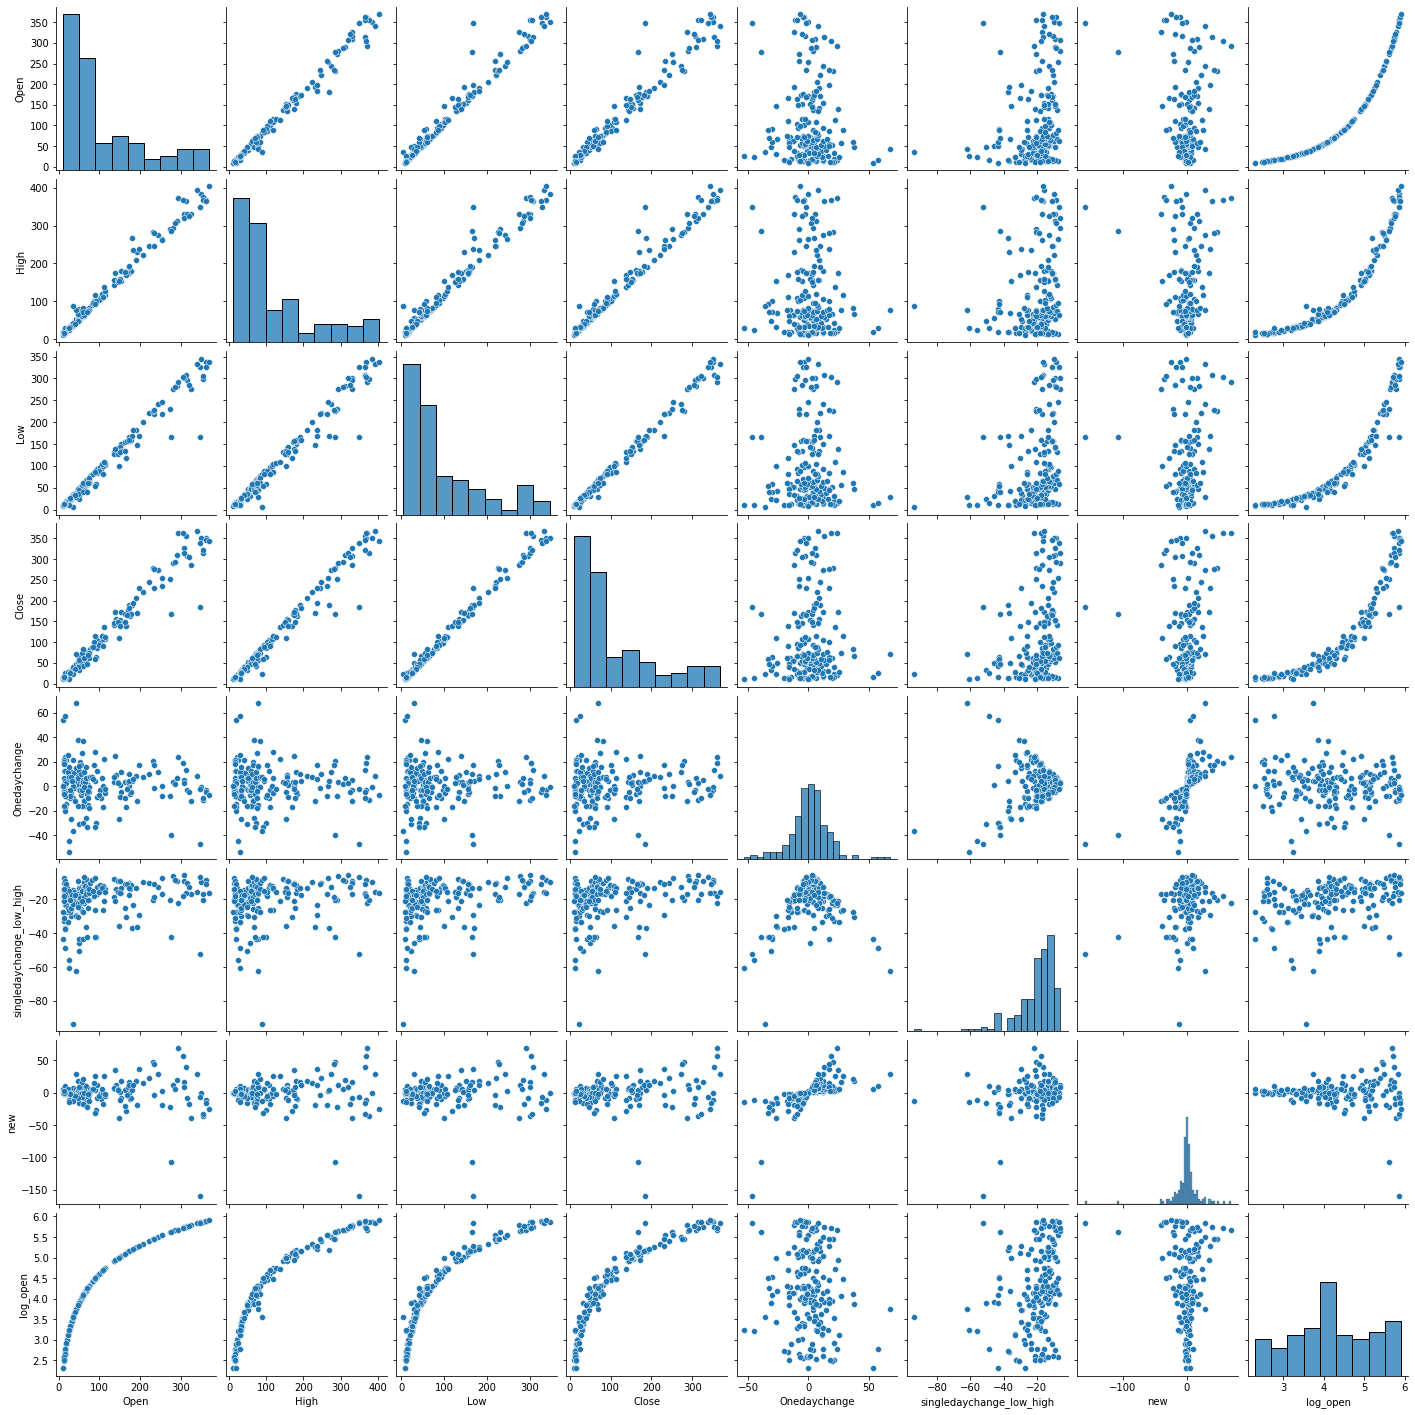

In [279]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [280]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [281]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [282]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [283]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Date                        0
Open                        0
High                        0
Low                         0
Close                       0
year                        0
Onedaychange                0
singledaychange_low_high    0
Formatted_date              0
month                       0
Result                      0
new                         0
daily                       0
log_open                    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

No null values in the dataset, so there no need of imputation

### 2. Handling Outliers

In [284]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [285]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [286]:
# Expand Contraction

#### 2. Lower Casing

In [287]:
# Lower Casing

#### 3. Removing Punctuations

In [288]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [289]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [290]:
# Remove Stopwords

In [291]:
# Remove White spaces

#### 6. Rephrase Text

In [292]:
# Rephrase Text

#### 7. Tokenization

In [293]:
# Tokenization

#### 8. Text Normalization

In [294]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [295]:
# POS Taging

#### 10. Text Vectorization

In [296]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [297]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [298]:
# Select your features wisely to avoid overfitting

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [299]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Close','High','Low']]])

,variables,VIF
0,Open,4.936405
1,Onedaychange,1.793022
2,singledaychange_low_high,4.030666
3,new,1.904921
4,log_open,10.271108


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [300]:
# Transform Your data
std = StandardScaler()
X = np.log10(df['Open'])
X = X.values.reshape(-1,1)
X = std.fit_transform(X)
y = np.log10(df['Close'])
y = y.values.reshape(-1,1)

### 6. Data Scaling

In [301]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [302]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [303]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(148, 1)
(37, 1)


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [304]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [305]:
# ML Model - 1 Implementation

# Fit the Algorithm


reg = LinearRegression().fit(X_train, y_train)

# Predict on the model
reg.score(X_train, y_train)

0.966055678539003

In [306]:
ridge = Ridge(alpha = 0.1)

# Fit the Algorithm
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [307]:
ridge.score(X_train,y_train)

0.9660552110653181

In [308]:
reg.coef_

array([[0.41804808]])

In [309]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [310]:
y_pred_r1 = ridge.predict(X_test)

In [311]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3153.2938891810672
RMSE : 56.15419743154618
R2 : 0.7198541926882391
Adjusted R2 :  0.711850026765046


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [312]:
# Visualizing evaluation Metric Score chart


MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 397.61362847318674
RMSE : 19.940251464642735


In [313]:

r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9646751001138977
Adjusted R2 :  0.963665817260009


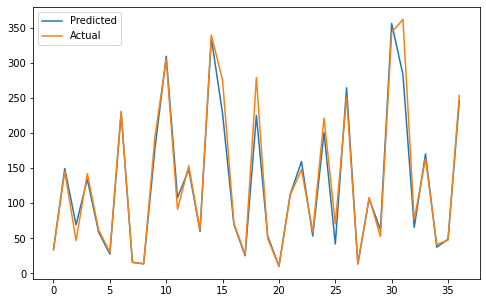

In [314]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [315]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

# Predict on the model

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [316]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.006382705317446901


In [317]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 421.43980532109475
RMSE : 20.528999131012082
R2 : 0.9625583283245281
Adjusted R2 :  0.9614885662766576


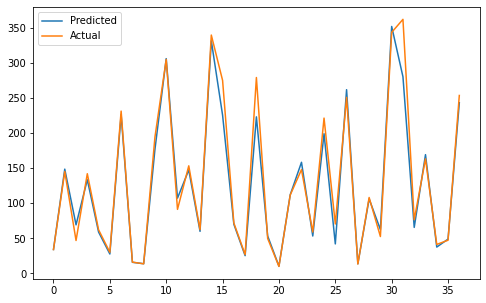

In [318]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [319]:
# Visualizing evaluation Metric Score chart
lasso = Lasso(alpha=0.1)


lasso.fit(X_train, y_train)



Lasso(alpha=0.1)

In [320]:
lasso.score(X_train, y_train)

0.9073834532654201

In [321]:
y_pred_r = lasso.predict(X_test)

In [322]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3153.2938891810672
RMSE : 56.15419743154618
R2 : 0.7198541926882391
Adjusted R2 :  0.711850026765046


#### 2. Cross- Validation & Hyperparameter Tuning

In [323]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
# Fit the Algorithm

# Predict on the model

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.006403141601491212


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [324]:
# ML Model - 3 Implementation
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)


# Predict on the model

In [325]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [326]:
elasticnet.score(X_train, y_train)

0.9393793708684872

In [327]:
y_pred_en = elasticnet.predict(X_test)

In [328]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1930.7807145399602
RMSE : 43.9406499103047
R2 : 0.8284650460673517
Adjusted R2 :  0.8235640473835618


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

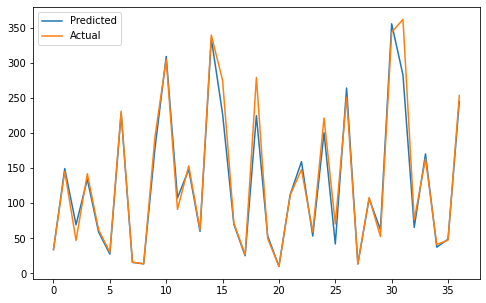

In [329]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_r1))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [330]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
# Hyperprarameter tuning

elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)
# Predict on the model

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [331]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [332]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.7}

Using  {'alpha': 0.001, 'l1_ratio': 0.7}  the negative mean squared error is:  -0.006314927807528859


In [333]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 404.1614657707602
RMSE : 20.10376745216578
R2 : 0.964093375342804
Adjusted R2 :  0.9630674717811699


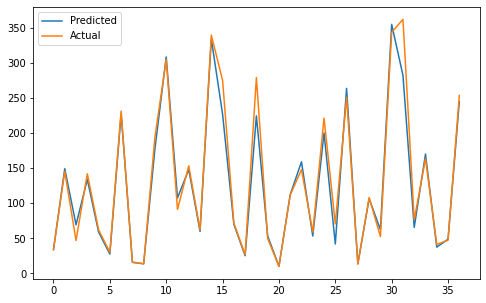

In [334]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [335]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [336]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***